<a href="https://colab.research.google.com/github/IshaqKHATTAK/machine-learning-from-scratch-using-python/blob/main/voting_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
video = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!mkdir -p ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:

!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download saadmansakib/smartphone-human-fall-dataset

  0% 0.00/151k [00:00<?, ?B/s]
100% 151k/151k [00:00<00:00, 68.0MB/s]


In [6]:
!unzip '/content/smartphone-human-fall-dataset.zip'

Archive:  /content/smartphone-human-fall-dataset.zip
  inflating: Test.csv                
  inflating: Train.csv               


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import calendar

import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime

import warnings

In [8]:
train = pd.read_csv('/content/Train.csv')
test = pd.read_csv('/content/Test.csv')

In [11]:
train.shape

(1428, 12)

In [9]:
train.head(4)

,Unnamed: 0,acc_max,gyro_max,acc_kurtosis,gyro_kurtosis,label,lin_max,acc_skewness,gyro_skewness,post_gyro_max,post_lin_max,fall
0,661,26.039919,7.309797,20.378162,2.782476,SDL,11.131080,3.891361,1.592927,7.086618,10.790400,1
1,122,25.864500,6.511954,14.187190,5.324864,FOL,7.945561,3.022175,2.376939,6.325522,7.719352,1
2,113,27.524501,12.944099,31.855926,22.891186,FOL,14.454818,4.849024,4.283890,12.888111,14.368784,1
3,14,30.647705,11.694868,23.608764,9.287735,FOL,15.228303,3.921537,2.794609,11.549971,14.944151,1


In [10]:
test.head(4)


,Unnamed: 0,acc_max,gyro_max,acc_kurtosis,gyro_kurtosis,label,lin_max,acc_skewness,gyro_skewness,post_gyro_max,post_lin_max,fall
0,9,28.055199,10.794617,21.334536,34.163811,FOL,13.880578,3.283404,4.577283,10.755339,13.762561,1
1,11,26.639681,8.785024,13.518671,12.812894,FOL,15.789372,3.301849,3.464729,8.277714,15.341656,1
2,19,25.045219,5.307413,21.603060,4.754182,FOL,11.592445,3.124714,2.268676,4.976134,11.303823,1
3,23,24.102184,8.929061,24.647657,18.595684,FOL,10.107835,4.522305,3.955288,8.719755,9.727437,1


# feature engineering

In [16]:
train = train.drop(['label'],axis = 1)
test = test.drop(['label'],axis = 1)

In [18]:
train.dtypes

acc_max          float64
gyro_max         float64
acc_kurtosis     float64
gyro_kurtosis    float64
lin_max          float64
acc_skewness     float64
gyro_skewness    float64
post_gyro_max    float64
post_lin_max     float64
fall               int64
dtype: object

In [19]:
train.isna().sum()

acc_max          0
gyro_max         0
acc_kurtosis     0
gyro_kurtosis    0
lin_max          0
acc_skewness     0
gyro_skewness    0
post_gyro_max    0
post_lin_max     0
fall             0
dtype: int64

In [20]:
test.isna().sum()

acc_max          0
gyro_max         0
acc_kurtosis     0
gyro_kurtosis    0
lin_max          0
acc_skewness     0
gyro_skewness    0
post_gyro_max    0
post_lin_max     0
fall             0
dtype: int64

<Axes: >

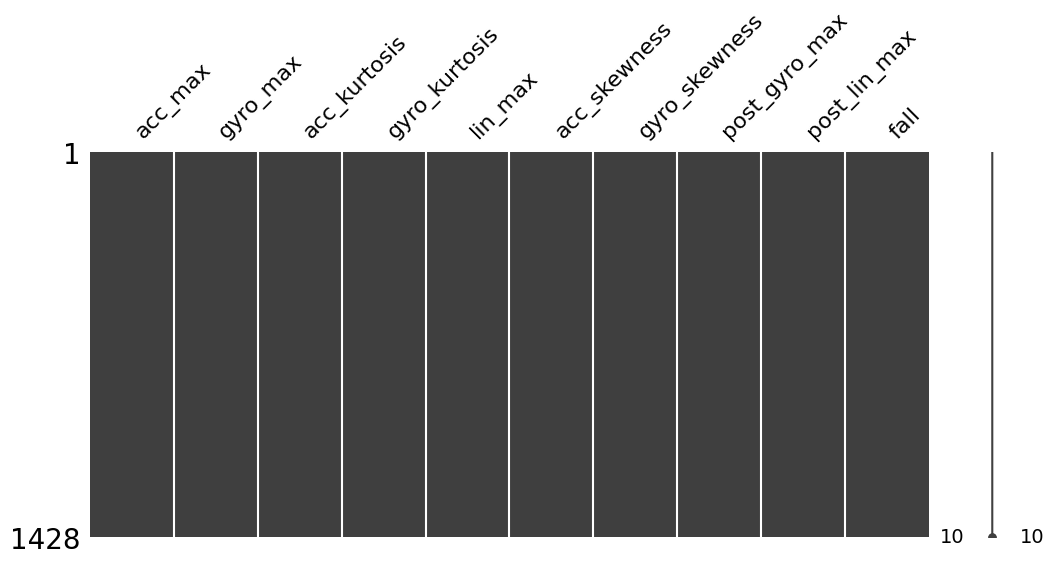

In [22]:
#skewness distribution
msno.matrix(train,figsize=(12,5))

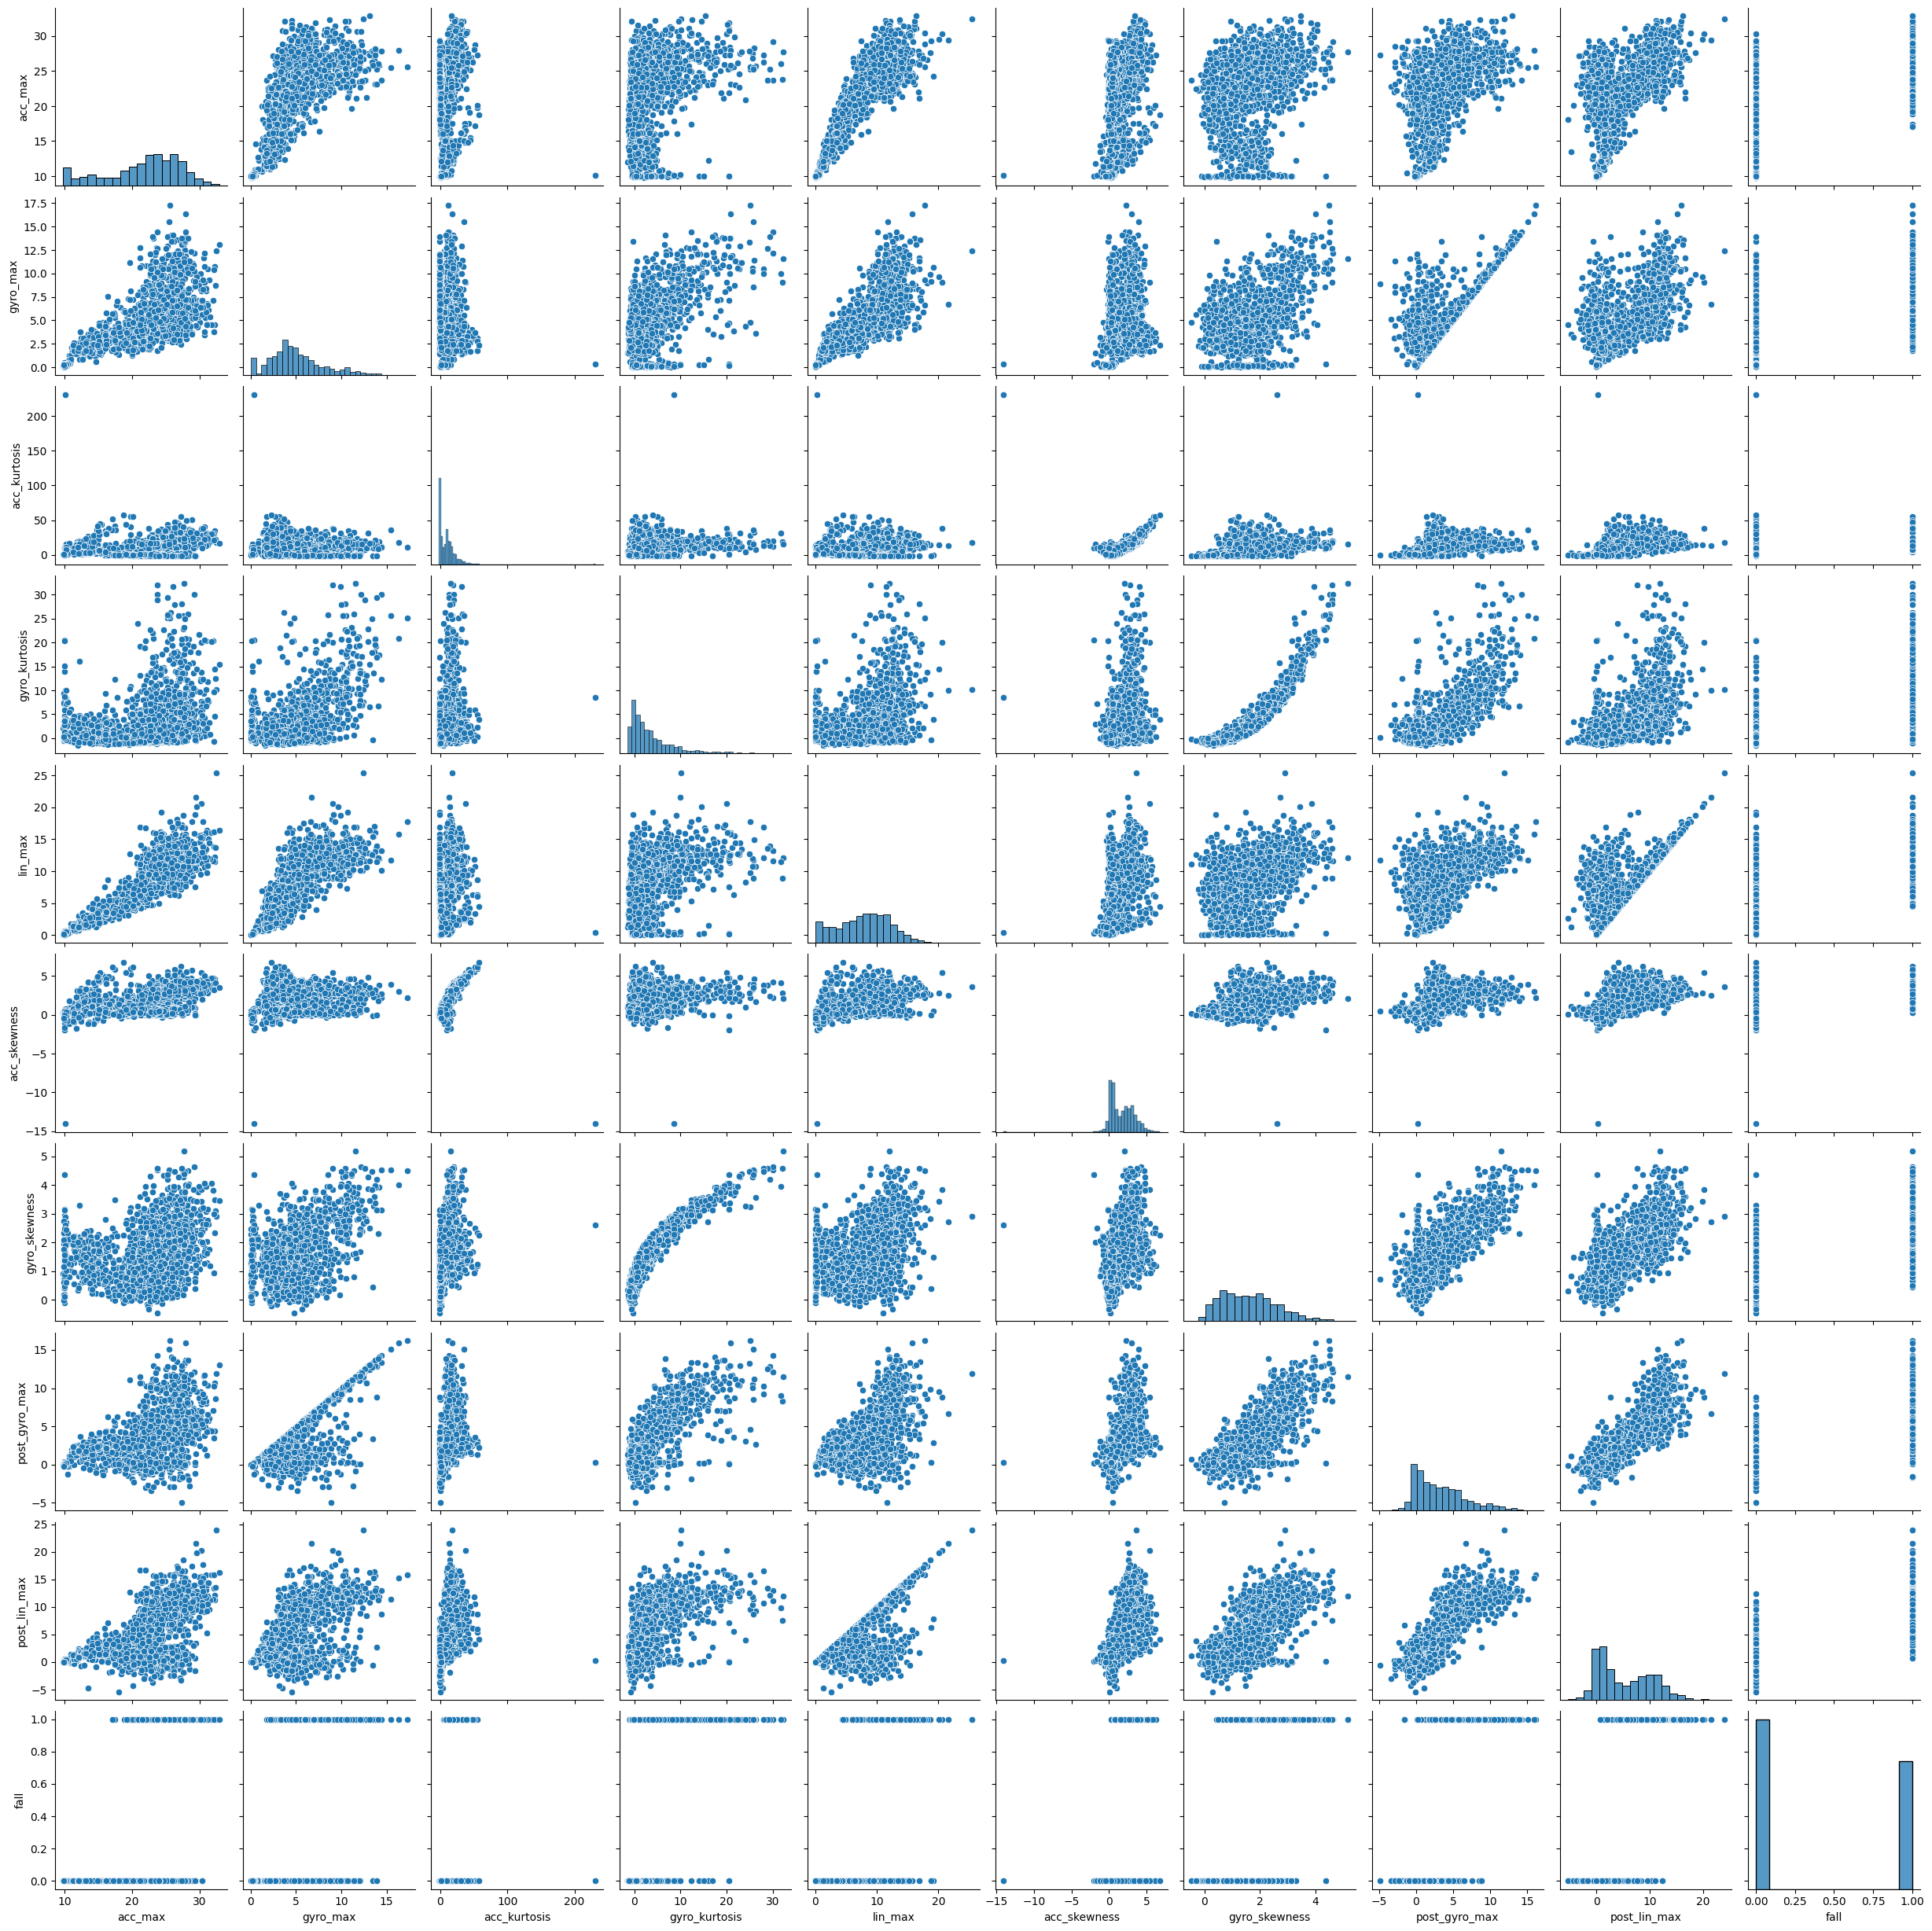

In [24]:
import seaborn as sns
sns.pairplot(train)

#model building

In [27]:
x_train = train.drop(['fall'],axis = 1)
y_train = train['fall']

x_test = test.drop(['fall'],axis = 1)
y_test = test['fall']

In [30]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

logistic_regression = LogisticRegression()
svm = SVC()
decision_tree = DecisionTreeClassifier()

estimators =  [('logistic', logistic_regression),('svm', svm),('decision trees', decision_tree)]



In [32]:
for estimator in estimators:
    x = cross_val_score(estimator[1],x_train,y_train,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

logistic 0.97
svm 0.98
decision trees 0.96


**Hard voting**

In [43]:
voting_clf = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(voting_clf,x_train,y_train,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.98


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.metrics import accuracy_score
for clf in (logistic_regression, svm, decision_tree, voting_clf):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression 0.9747191011235955
SVC 0.9719101123595506
DecisionTreeClassifier 0.9466292134831461
VotingClassifier 0.9719101123595506


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       203
           1       0.95      0.99      0.97       153

    accuracy                           0.97       356
   macro avg       0.97      0.97      0.97       356
weighted avg       0.97      0.97      0.97       356

